In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('final_csv_test.csv')

In [3]:
df.tail()

,id,EDA,TEMP,BVP,HR
451265,S35,0.229625,99999.0,3.92,99999.0
451266,S35,0.229625,99999.0,9.85,99999.0
451267,S35,0.228344,99999.0,14.94,99999.0
451268,S35,0.229625,99999.0,19.16,99999.0
451269,S35,0.228344,99999.0,22.43,99999.0


In [4]:
df.isna().sum()

id      0
EDA     0
TEMP    0
BVP     0
HR      0
dtype: int64

In [5]:
# REPLACE 99999 by N/A for simplifiaction
df.replace(99999.0, 'na', inplace=True)

In [6]:
df.isnull().sum()

id      0
EDA     0
TEMP    0
BVP     0
HR      0
dtype: int64

In [7]:
df.head()

,id,EDA,TEMP,BVP,HR
0,S02,4.000000,4.0,64.0,1.0
1,S02,0.000000,34.79,-0.0,118.0
2,S02,0.622764,34.79,-0.0,113.5
3,S02,0.759875,34.79,-0.0,93.0
4,S02,0.883157,34.79,-0.0,93.25


In [8]:
na_count = (df == 'na').mean()
na_count

id      0.000000
EDA     0.000000
TEMP    0.000412
BVP     0.000000
HR      0.750695
dtype: float64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 451270 entries, 0 to 451269
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      451270 non-null  object 
 1   EDA     451270 non-null  float64
 2   TEMP    451270 non-null  object 
 3   BVP     451270 non-null  float64
 4   HR      451270 non-null  object 
dtypes: float64(2), object(3)
memory usage: 17.2+ MB


In [10]:
target_column = 'HR'
df[target_column] = df[target_column].apply(lambda x: np.random.uniform(90, 180) if x == "na" else x)

# impute TEMP column
# Replace 'na' strings with np.nan in column 'A'
df['TEMP'] = df['TEMP'].replace('na', np.nan)

# Impute missing values in column 'A' using the mean of column 'A'
df['TEMP'] = df['TEMP'].fillna(df['TEMP'].mean())

# # Save the updated DataFrame back to the same CSV file
# file_path = 'combined_csv_test_HR.csv'
# df.to_csv(file_path, index=False)

In [11]:
df.tail()

,id,EDA,TEMP,BVP,HR
451265,S35,0.229625,31.29009,3.92,178.385886
451266,S35,0.229625,31.29009,9.85,114.447211
451267,S35,0.228344,31.29009,14.94,122.554359
451268,S35,0.229625,31.29009,19.16,142.719683
451269,S35,0.228344,31.29009,22.43,157.481964


In [12]:
na_count = (df == 'na').mean()
na_count

id      0.0
EDA     0.0
TEMP    0.0
BVP     0.0
HR      0.0
dtype: float64

<Axes: >

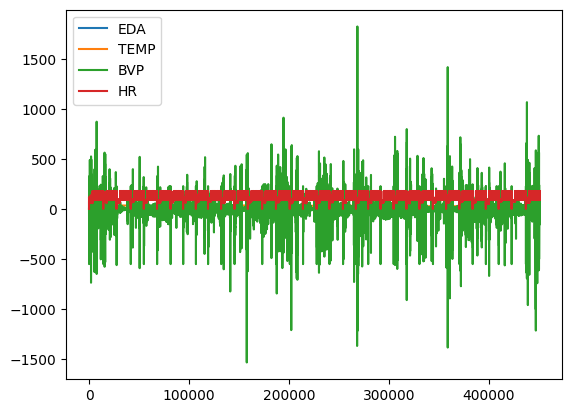

In [13]:
df.plot()

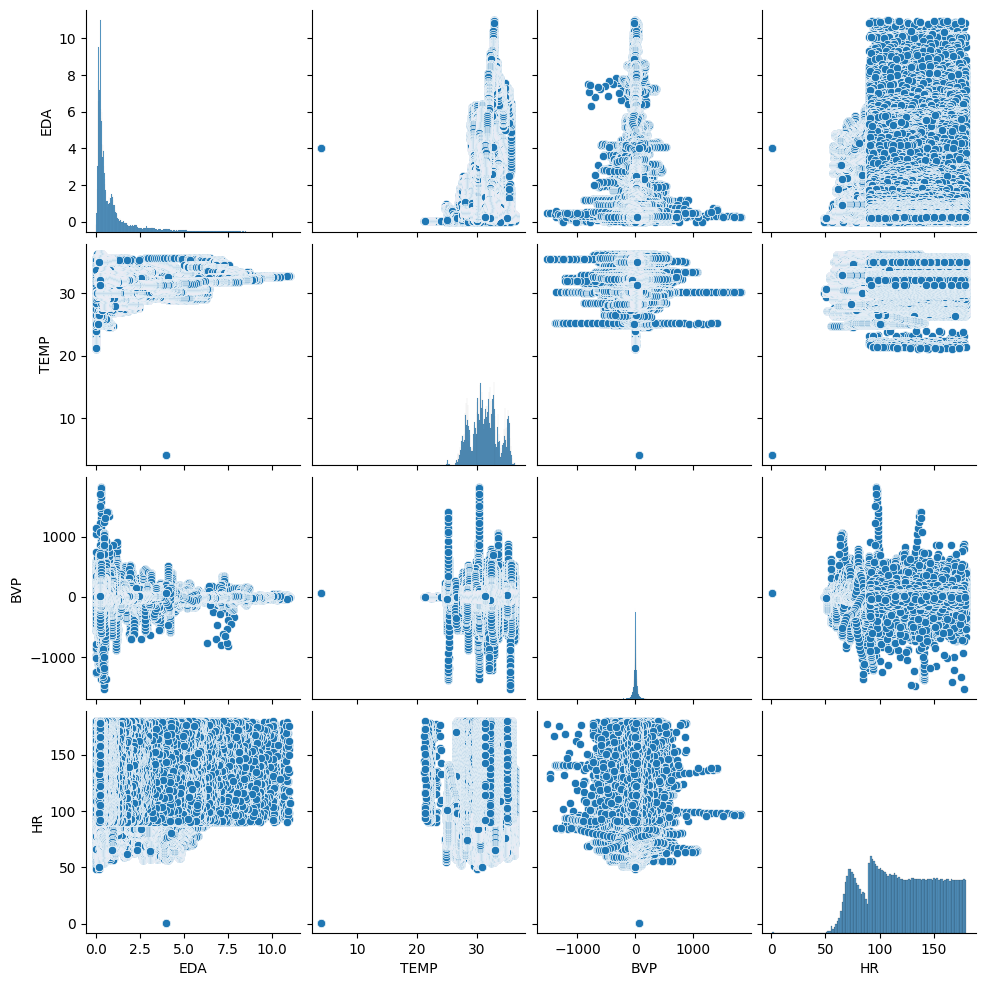

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df)

# Show the plot
plt.show()

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 451270 entries, 0 to 451269
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      451270 non-null  object 
 1   EDA     451270 non-null  float64
 2   TEMP    451270 non-null  float64
 3   BVP     451270 non-null  float64
 4   HR      451270 non-null  float64
dtypes: float64(4), object(1)
memory usage: 17.2+ MB


In [16]:
na_count = (df == 'na').sum()
na_count

id      0
EDA     0
TEMP    0
BVP     0
HR      0
dtype: int64

In [17]:
df.describe()

,EDA,TEMP,BVP,HR
count,451270.000000,451270.000000,451270.000000,451270.000000
mean,0.957080,31.290090,0.023578,121.353965
std,1.324882,2.336219,67.463498,33.302395
min,0.000000,4.000000,-1531.900000,1.000000
25%,0.240890,29.690000,-13.710000,94.100923
50%,0.430794,31.310000,1.300000,120.304343
75%,1.040876,32.810000,15.620000,150.059999
max,11.005073,36.390000,1822.090000,179.998776


In [18]:
# Skewed data to normal data

from scipy import stats
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method='yeo-johnson', standardize=False)
df['EDA'] = pt.fit_transform(df[['EDA']])

In [19]:
from ydata_profiling import ProfileReport

# Read the CSV file into a dataframe
#df = pd.read_csv(r'C:\Users\sahus\Stress-Prediction\final_csv_test.csv')

# Generate a profiling report
profile = ProfileReport(df, title="Data Profile Report", explorative=True)

# Save the report to an HTML file
profile.to_file("data_profile.html")

print("The profiling report has been generated!")


c:\Program Files\Python38\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Export report to file: 100%|██████████| 1/1 [00:00<00:00, 199.86it/s]

The profiling report has been generated!


In [20]:
df = df.drop('id', axis=1)

c:\Program Files\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Program Files\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Program Files\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Program Files\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the valu

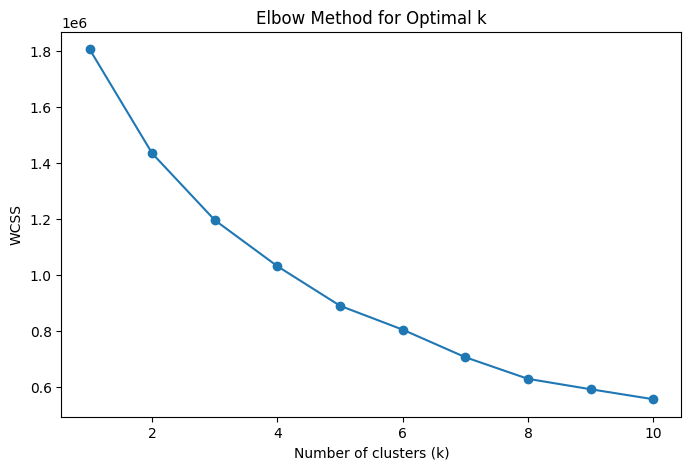

'# Choose optimal k and apply KMeans\nk_optimal = 3 # Set optimal k based on elbow plot\nkmeans = KMeans(n_clusters=k_optimal,  n_init=100, init="k-means++")\ncluster_labels = kmeans.fit_predict(X_scaled)\n\ntsne = TSNE(n_components=2, perplexity=30, random_state=42)\nX_tsne = tsne.fit_transform(X)\n\n# Plot t-SNE results with cluster labels\nplt.figure(figsize=(10, 6))\nscatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=cluster_labels, cmap=\'viridis\', alpha=0.6)\nplt.colorbar(scatter, label=\'Cluster\')\nplt.title("t-SNE Clustering Visualization")\nplt.xlabel("t-SNE Component 1")\nplt.ylabel("t-SNE Component 2")\nplt.show()\n\n# Add cluster labels to DataFrame\ndf[\'Cluster\'] = cluster_labels\nprint(df.head())\n\n# Visualize with PCA\npca = PCA(n_components=2)\nX_pca = pca.fit_transform(X_scaled)\n\nplt.figure(figsize=(10, 6))\nsns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=cluster_labels, palette=\'viridis\', s=50, alpha=0.7)\nplt.xlabel("Principal Component 1")\nplt.ylabel("P

In [22]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE


# Assume df is your DataFrame with unlabeled data
X = df.values  # Convert DataFrame to array

# Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Elbow Method to find optimal k
wcss = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, wcss, marker='o')
plt.xlabel("Number of clusters (k)")
plt.ylabel("WCSS")
plt.title("Elbow Method for Optimal k")
plt.show()

'''# Choose optimal k and apply KMeans
k_optimal = 3 # Set optimal k based on elbow plot
kmeans = KMeans(n_clusters=k_optimal,  n_init=100, init="k-means++")
cluster_labels = kmeans.fit_predict(X_scaled)

tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X)

# Plot t-SNE results with cluster labels
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=cluster_labels, cmap='viridis', alpha=0.6)
plt.colorbar(scatter, label='Cluster')
plt.title("t-SNE Clustering Visualization")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.show()

# Add cluster labels to DataFrame
df['Cluster'] = cluster_labels
print(df.head())

# Visualize with PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=cluster_labels, palette='viridis', s=50, alpha=0.7)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("KMeans Clustering Results (2D PCA)")
plt.legend(title="Cluster")
plt.show()

# Analyze cluster centers
#cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
#centers_df = pd.DataFrame(cluster_centers, columns=df.columns[:-1])  # Assuming last column is 'Cluster'
#print("Cluster Centers:\n", centers_df)

# Check cluster sizes
#print(df['Cluster'].value_counts())
'''

In [41]:
k_optimal = 2 # Set optimal k based on elbow plot
kmeans = KMeans(n_clusters=k_optimal,  n_init=100, init="k-means++")
cluster_labels = kmeans.fit_predict(X_scaled)

        EDA   TEMP   BVP      HR  Cluster
0  0.563729   4.00  64.0    1.00        0
1 -0.000000  34.79  -0.0  118.00        0
2  0.333482  34.79  -0.0  113.50        1
3  0.367651  34.79  -0.0   93.00        1
4  0.392873  34.79  -0.0   93.25        1


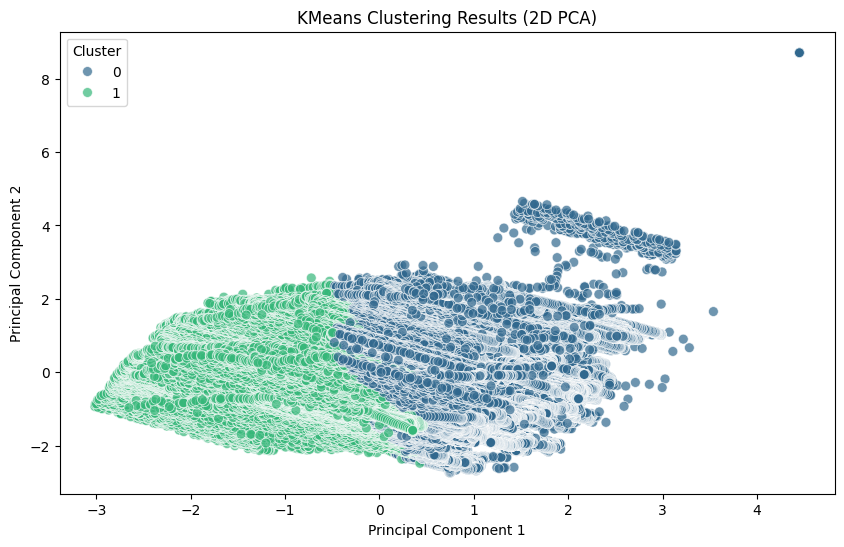

In [42]:
df['Cluster'] = cluster_labels
print(df.head())

# Visualize with PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=cluster_labels, palette='viridis', s=50, alpha=0.7)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("KMeans Clustering Results (2D PCA)")
plt.legend(title="Cluster")
plt.show()

In [43]:
df.head()

,EDA,TEMP,BVP,HR,Cluster
0,0.563729,4.00,64.0,1.00,0
1,-0.000000,34.79,-0.0,118.00,0
2,0.333482,34.79,-0.0,113.50,1
3,0.367651,34.79,-0.0,93.00,1
4,0.392873,34.79,-0.0,93.25,1


In [45]:
df.to_csv(r"C:\Users\sahus\Stress-Prediction\cluster_test.csv")

In [47]:

# Check cluster sizes
print(df['Cluster'].value_counts())


Cluster
1    227960
0    223310
Name: count, dtype: int64
